Importing the dependencies

In [32]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras 
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras.models import load_model


Functions used

In [34]:
def preprocess_image(image_path):
    
    img = cv2.imread(image_path)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize with high-quality interpolation (prevents thin lines from disappearing)
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

    # Invert colors if necessary
# If the background is brighter than the text (white paper), invert it.(check the average pixel intensity)
    if np.mean(resized) > 127:
        resized = cv2.bitwise_not(resized)
    
    normalized = resized / 255.0
   
    reshaped = np.expand_dims(normalized, axis=0)
    
    return reshaped

Loading the MNIST from keras dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # load_data returns processed images

In [4]:
# checking the shape of the data - numpy arrays

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

# Training data contains 60000 images of 28*28 pixels in grayscale(1 channel) format. Y_train contains labels ranging from 0-9
# Test data contains 10000 images of 28*28 pixels in grayscale(1 channel) format. Y_test contains labels for the test data from 0-9

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


3


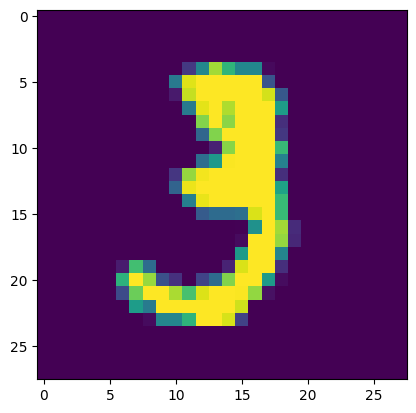

In [5]:
# checking random image from dataset 
# print(X_train[10])

plt.imshow(X_train[10])
print(Y_train[10])

In [6]:
# Normalisation of the data (scaling)

X_train = X_train/255
X_test = X_test/255


Building the neural network 

In [7]:
# setting up the layers for the neural network 

model = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(), 
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])

I0000 00:00:1767377449.440926   35508 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [8]:
# compiling the network

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# training the model 

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10


2026-01-02 23:40:55.535376: I external/local_xla/xla/service/service.cc:163] XLA service 0x7e0c740050b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-02 23:40:55.535454: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2026-01-02 23:40:55.700555: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-02 23:40:56.219354: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91701
2026-01-02 23:40:56.338314: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-02 23:40:57.

  24/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2668 - loss: 2.1609 

I0000 00:00:1767377461.731136   36231 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9131 - loss: 0.3009
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9571 - loss: 0.1464
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9671 - loss: 0.1092
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9739 - loss: 0.0863
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9779 - loss: 0.0706
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9823 - loss: 0.0584
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9848 - loss: 0.0500
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9874 - loss: 0.0421
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9880 - loss: 0.0384
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9902 - loss: 0.0331


Model evaluation

In [10]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9721 - loss: 0.1083


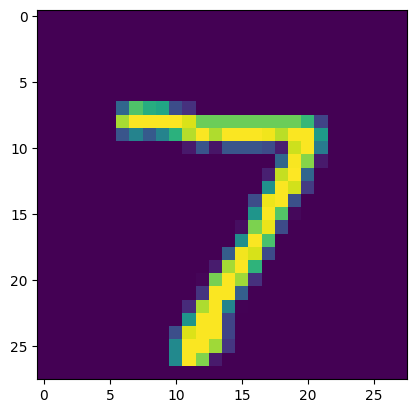

7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
[[1.0039181e-08 2.9130001e-12 3.8160510e-07 3.3379871e-05 1.7897497e-15
  1.9087581e-07 1.2136227e-15 9.9994910e-01 5.9275078e-09 1.7011156e-05]]
Predicted Digit: 7


In [11]:
# Training data accuracy = 98.9%
# Test data accuracy = 96.9% 

# Confirming test data

plt.imshow(X_test[0])
plt.show()
print(Y_test[0])


single_prediction = model.predict(X_test[0:1]) # used slicing operator to keep the object as a multidimensional array/ act like a batch 

print(single_prediction)
print(f"Predicted Digit: {np.argmax(single_prediction)}")

In [12]:
# converting prediction to class labels 
Y_pred = model.predict(X_test)
Y_pred_labels = [np.argmax(i).item() for i in Y_pred]
print(Y_pred_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5

Confusion Matrix

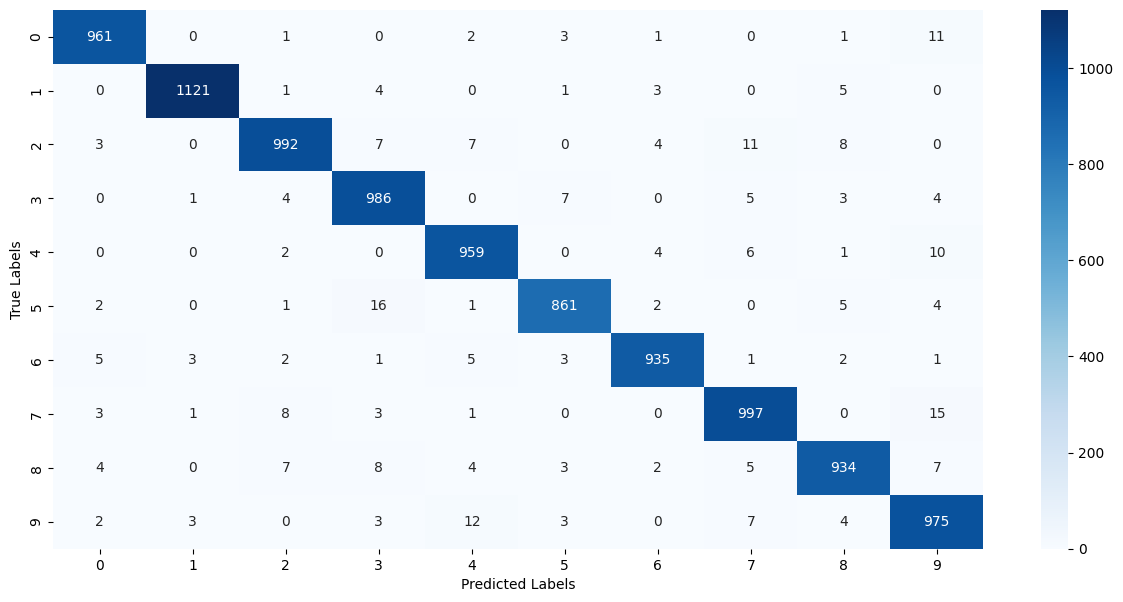

In [13]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
# print(conf_mat)

plt.figure(figsize=(15, 7 ))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

Predictive System

(318, 318, 3)


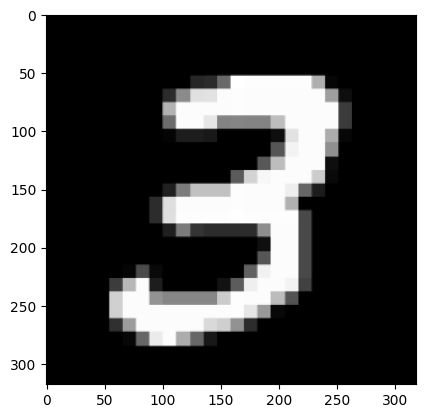

In [19]:
# Input image and processing 
image_path = 'MNIST_digit.png'
input_image = cv2.imread(image_path)
print(input_image.shape)

plt.imshow(input_image, cmap='gray')
plt.show()

In [ ]:
image_reshaped = preprocess_image('MNIST_digit.png')

# print(image_reshaped.shape)

# Predict
prediction = model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [ ]:
input_pred = model.predict(image_reshaped)
# print(input_pred)
input_pred_label = np.argmax(input_pred)
print(f'Image is predicted as the number {input_pred_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Image is predicted as the number 3


Saving the model

In [31]:
model.save(os.path.join('models', 'MNIST_model.keras'))

In [ ]:
new_model = load_model(os.path.join('models', 'MNIST_model.keras'))
new_pred = new_model.predict(np.expand_dims)